# Linear Regression using Gradient Descent

We want to solve linear regression using Gradient Descent

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
plt.ion()

# Part 0: getting the data

**Remark about the data**: here, we work with a **toy example** where the data is generated from a linear relationship + some noise. So, we can actually read the true value of the coefficients. 

But of course, **in real life, you do not have access** to the true model which generated the data, and certainly not access to its parameters either !

#### We help you create the data

In [2]:
def createData(N,theta0,theta1,sigmaNoise): 
    Xrange = 10
    D = 1
    ## x are random
    X = np.random.random((N,D))*Xrange   
    ## the "y" (ordinates axis) are y=a.x+b + noise
    noise = np.random.normal(0,sigmaNoise, (N,D))
    y = theta0 + theta1*X + noise   # not available in real life

    # for your numpy education, here is another method to create the data:
    theta = np.array([theta0, theta1]).reshape((2,1))
    Xaugmented = np.hstack((np.ones((N,1)) , X )) # this 1 is really a 1, not a D !
    y2 = (Xaugmented @ theta) + noise
    
    print("difference in the 2 methods:",  (abs(y-y2)).sum()  ) # we then check that this prints ~0
    
    return X, y

In [3]:
######### data creation #########
seed=42
np.random.seed(seed)
N=100
theta0=1.1                                                         # not available in real life
theta1=0.5                                                         # not available in real life
sigmaNoise = 0.5                                                   # not available in real life
X, y = createData(N,theta0,theta1,sigmaNoise) ## training data 
Ntest=N//2
Xtest, ytest = createData(Ntest,theta0,theta1,sigmaNoise) ## test data

difference in the 2 methods: 0.0
difference in the 2 methods: 0.0


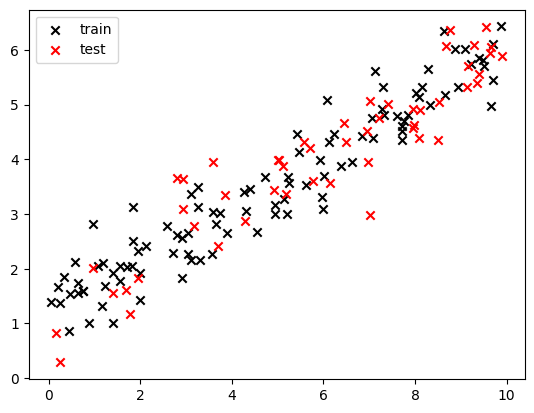

In [4]:
####### data visualization ###########
plt.figure()
plt.scatter(X,y, label="train", marker='x',color='k')
plt.scatter(Xtest,ytest, label= "test", marker='x',color='red')
plt.legend()

# Part 1: handcrafted model

## 1. Model defintion, initalization

- create a model, i.e. a function $f_\Theta(x)$
- choose hyper-parameters `eta`, `MaxIter`, and set the dimension of data `D` appropriately (if you have no idea, put a stupid thing to start, you'll make it better later. Ask around, also ! This is not very important for now).
- make a stupid or random guess for an initial value of the parameters vector `theta`, i.e. for `thetaInitial`

In [6]:
### the model ###
def model(X, theta):
    return theta[0] + theta[1] * X

In [7]:
#### hyper-parameters #####
eta = 0.01
MaxIter = 500
D = 1

In [8]:
## initialization (in a sense, a hyper-parameter)
thetaInitial = np.array([1.2, 0.6]) # or np.random.random(D+1)-0.5 for random init

### Remark about the auxiliary ones trick:

If you prefer to write things using the trick of augmented X, to use more matrix operations, 
- you're right !
- go see the d-dimensional case, where the data X is defined with its augmented component (filled with ones)

But if you prefer not to, for now, it's ok.

## 2. Update rule

### Now the crucial part 

- **take a piece of paper and a pencil, and derive the update rule for your function $f_\Theta(x)$**, according to the method of Grandient Descent. Really do it on paper, not on the computer !!
Use the Mean Squared Error Loss.

### Now to code it

- implement a function `fit(model, eta, MaxIter, D, theta, X, y)` that will update the parameters according to gradient descent
- run it !
- add a recording of train and test error to your fit function, so as to keep track of train and test error at all iterations of the algorithm

In [ ]:
def fit(model, eta, MaxIter, D, theta, X, y):
    ## note : D is actually useless !
    ??
    for iteration in range(MaxIter):
        ??
    return ??

In [ ]:
## run the fit function here

## 3. Training the model, testing the trained model

### Follow the results 

- plot the data (train and test), the initial guess, and the final model (all 4 things on a single graph).
- on a separate plot, show the *training error* and *test errror* evolution over the iterations (epochs)

In [ ]:
## plot the data, the noiseless-teacher, the model that was learned
plt.figure(1)
plt.scatter(X,y, label="train", marker='x',color='k')
plt.scatter(Xtest,ytest, label= "test", marker='x',color='red')
plt.legend()

In [ ]:
## follow the evolution of train and test accuracy or error
epochs = np.arange(MaxIter)
plt.figure(2)
plt.loglog(epochs, ??, label='train error')
plt.loglog(epochs, ??, label='test error')
plt.legend()

# Part 2: sklearn solution

## Comparing with the sklearn implementation

We can now cheat using `sklearn`, to check wether our results are consistent with it (they will often be *slightly*  different!)

In [ ]:
## check these lines at home   ##
import sklearn
from sklearn import datasets

from sklearn.linear_model import LinearRegression
reg_sklearn_object = sklearn.linear_model.LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=None)
Xreshaped = X.reshape((N,1))
reg_sklearn_object.fit(Xreshaped,y)
print("coeffs fitted by sklearn: ", reg_sklearn_object.coef_, reg_sklearn_object.intercept_)

Xtest_resh = Xtest.reshape((Ntest,1))
print(reg_sklearn_object.score(Xreshaped, y))
print(reg_sklearn_object.score(Xtest_resh, ytest))

In [ ]:
theta_sklearn = np.array([reg_sklearn_object.intercept_, reg_sklearn_object.coef_[0]])

In [ ]:
## plot the data, the noiseless-teacher, the model that was learned
plt.figure(1)
plt.scatter(X,y, label="train", marker='x',color='k')
plt.scatter(Xtest,ytest, label= "test", marker='x',color='red')
plt.plot(X, model(theta_sklearn,X), color='teal')
plt.legend()

### Homework: read and understand well each line in the sklearn piece of code

# Part 3:  the augmented X trick:

### Warning:

Make sure to complete the pen-and-paper exercise 1.1.2 of "Regressions.pdf" before trying to do this !

In [ ]:
# we add ones where we need them
Xa        = np.hstack((np.ones((N,1))    , X))
Xtest_aug = np.hstack((np.ones((Ntest,1)), Xtest))
theta_aug = thetaInitial.reshape(D+1,1)

In [ ]:
def model2(X, theta):
    return X@theta

In [ ]:
def fit_augmented(model, eta, MaxIter, D, theta, X, y, Xtest, ytest):
    
    ???
    
    return theta, trainError, testError

In [ ]:
theta, trainError, testError = fit_augmented(model2, eta, MaxIter, D, theta_aug, Xa, y, Xtest_aug, ytest)

In [ ]:
theta

---------------- 
# (optional) $d$-dimensional input

### This is Optional Homework

-> See TP1.2 for some help to start on this

---------------- 
# (optional) Polynomial regression

### Optional Homework: do the same, but using a 3-rd order polynomial (in data generation, and in your model) 

(advice: keep a $D=1$ input)

-> See TP1.3 for some help to start on this

-> We'll see a smarter trick to do that (aka Kernels/feature maps) later in the course.